In [2]:
import sqlite3

In [5]:
# Connect to (or create) the database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [6]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

In [8]:
sample_data = [
    ("Pen", 10, 5.0),
    ("Notebook", 5, 20.0),
    ("Pencil", 15, 2.0),
    ("Eraser", 8, 3.0),
    ("Pen", 7, 5.0),
    ("Notebook", 2, 20.0),
    ("Pencil", 6, 2.0),
    ("Eraser", 4, 3.0),
]

In [9]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("✅ Step 1 Complete: Database and sample data created.")

✅ Step 1 Complete: Database and sample data created.


In [22]:
import sqlite3
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query to summarize sales
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Run query while connection is open
df = pd.read_sql_query(query, conn)

# Now close the connection
conn.close()

# Print the result
print("🔍 Sales Summary:")
print(df)


🔍 Sales Summary:
    product  total_qty  revenue
0    Eraser         12     36.0
1  Notebook          7    140.0
2       Pen         17     85.0
3    Pencil         21     42.0


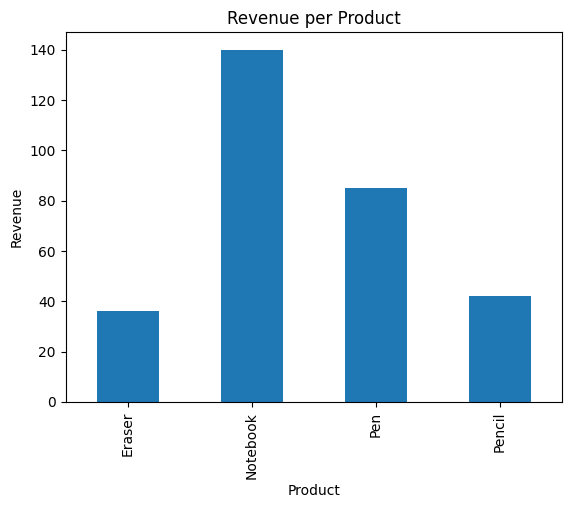

In [23]:
import matplotlib.pyplot as plt

# Plot bar chart: product vs revenue
df.plot(kind='bar', x='product', y='revenue', legend=False)

# Add labels and title
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue per Product")

# Optional: Save the chart as an image
plt.savefig("sales_chart.png", bbox_inches='tight')

# Show the chart
plt.show()


In [ ]:
### Summary of Findings
## The sales data was analyzed using SQL queries executed in Python via `sqlite3` and `pandas`.
## Total "quantity sold" and "revenue per product" were calculated using SQL aggregation functions.
## The product-wise revenue chart revealed:
  # 🖊️ 'Pen' and 📓 'Notebook' generated the 'highest revenue'.
  # ✏️ 'Pencil' and 🧽 'Eraser' contributed moderately to overall sales.
## A bar chart was created using `matplotlib` to visualize revenue by product, and the image was saved as `sales_chart.png`.
